In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [71]:
df=pd.read_csv('Hitters.csv')

In [72]:
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


In [73]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [74]:
mean=df['Salary'].mean()
df['Salary'].fillna(value=mean,inplace=True)

In [75]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [76]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [77]:
df['League']=df['League'].factorize()[0]
df['Division']=df['Division'].factorize()[0]
df['NewLeague']=df['NewLeague'].factorize()[0]

In [78]:
df['Salary']=df['Salary'].astype(int)
df['NewLeague']=df['NewLeague'].astype(int)
df['Division']=df['Division'].astype(int)
df['League']=df['League'].astype(int)

In [79]:
df.dtypes

AtBat        int64
Hits         int64
HmRun        int64
Runs         int64
RBI          int64
Walks        int64
Years        int64
CAtBat       int64
CHits        int64
CHmRun       int64
CRuns        int64
CRBI         int64
CWalks       int64
League       int32
Division     int32
PutOuts      int64
Assists      int64
Errors       int64
Salary       int32
NewLeague    int32
dtype: object

In [80]:
X=df.iloc[:,[10,11]].values
#idhar ye kyu kiya samjha nahi

In [81]:
X

array([[  30,   29],
       [ 321,  414],
       [ 224,  266],
       [ 828,  838],
       [  48,   46],
       [ 501,  336],
       [  30,    9],
       [  41,   37],
       [  32,   34],
       [ 784,  890],
       [ 702,  504],
       [ 192,  186],
       [ 205,  204],
       [ 309,  103],
       [ 376,  290],
       [  20,   16],
       [1045,  993],
       [  65,   23],
       [ 643,  658],
       [  67,   82],
       [  72,   48],
       [  55,   43],
       [   9,    9],
       [ 242,  251],
       [1008, 1072],
       [ 442,  198],
       [ 291,  108],
       [ 246,  327],
       [ 349,  182],
       [ 763,  734],
       [1033,  864],
       [  80,   46],
       [ 545,  652],
       [ 219,  208],
       [ 126,  132],
       [ 859,  803],
       [ 156,   86],
       [  34,   29],
       [ 784,  901],
       [  34,   12],
       [  20,   29],
       [ 796,  627],
       [ 371,  230],
       [  86,   76],
       [ 486,  493],
       [ 108,  117],
       [ 113,  121],
       [ 117,

In [82]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

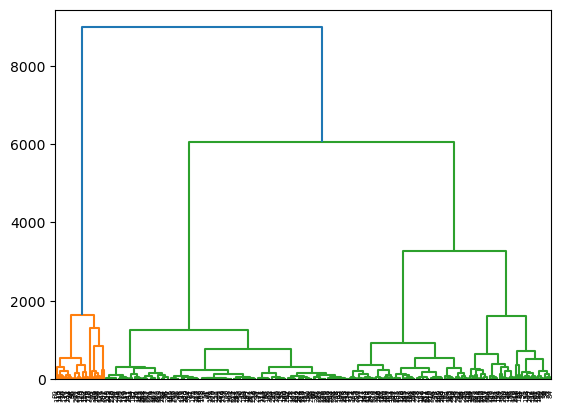

In [83]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))

In [105]:
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
model.fit(X)
labels=model.labels_


In [106]:
labels

array([2, 3, 3, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 1, 2, 2, 2,
       2, 3, 0, 3, 2, 3, 3, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2,
       1, 2, 2, 2, 0, 3, 0, 2, 2, 1, 1, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 1, 0, 2, 1, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2,
       1, 2, 2, 3, 2, 2, 2, 3, 0, 1, 2, 3, 0, 2, 2, 3, 0, 2, 2, 1, 3, 2,
       0, 2, 0, 2, 0, 3, 2, 0, 3, 2, 0, 0, 2, 2, 1, 1, 3, 3, 3, 1, 3, 2,
       0, 2, 2, 2, 3, 1, 2, 2, 2, 2, 1, 0, 1, 3, 3, 3, 3, 1, 2, 2, 2, 3,
       3, 2, 1, 2, 1, 2, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 2,
       2, 3, 1, 0, 3, 1, 3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 3, 0, 2, 3, 2, 1, 2,
       3, 0, 2, 3, 3, 3, 1, 0, 2, 3, 3, 2, 3, 2, 1, 3, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 1, 2, 3, 2, 0, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 3, 3,
       3, 2, 2, 2, 3, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3,

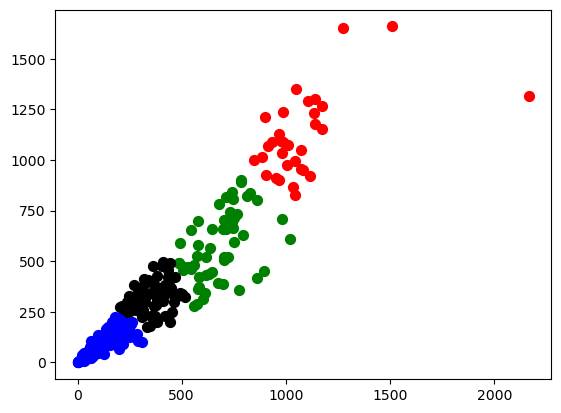

In [107]:
plt.scatter(X[labels==0,0],X[labels==0,1],s=50,marker='o',color='red')
plt.scatter(X[labels==1,0],X[labels==1,1],s=50,marker='o',color='green')
plt.scatter(X[labels==2,0],X[labels==2,1],s=50,marker='o',color='blue')
plt.scatter(X[labels==3,0],X[labels==3,1],s=50,marker='o',color='black')

c:\Users\sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'wcss')

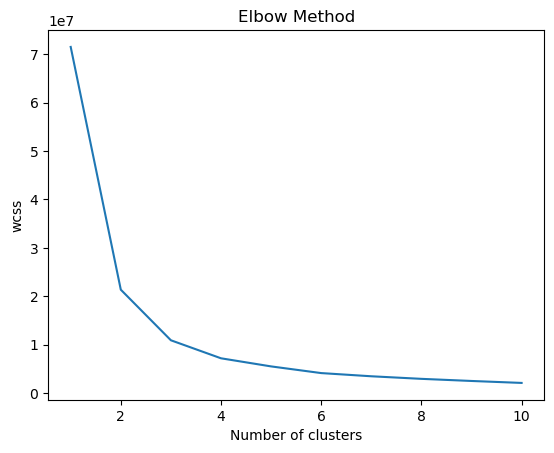

In [108]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")

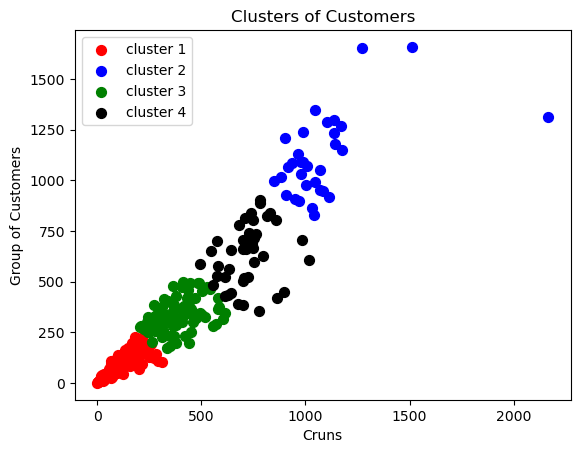

In [109]:
kmeans=KMeans(n_clusters=4 , init='k-means++', random_state=123)
y_kmeans=kmeans.fit_predict(X)

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='black',label='cluster 4')

plt.title('Clusters of Customers')
plt.xlabel('Cruns')
plt.ylabel('Group of Customers')
plt.legend()